Question 2

1.Accuracy

    Definition: Measures the proportion of true results (both true positives and true negatives) in the population.
    Application: Best for balanced datasets where the number of positive and negative cases is approximately equal.
    Example:
    In email classification, if the goal is to broadly assess how well the model identifies spam and non-spam emails across a balanced dataset.
    
    
2.Sensitivity (Recall for the positive class)

    Definition: Measures the proportion of actual positives correctly identified.
    Application: Prioritized when it’s crucial to identify as many positive cases as possible.
    Example:
    Medical Diagnosis: For detecting diseases (e.g., cancer screening), where missing a positive case (false negative) can have severe consequences.
    
    
3.Specificity

    Definition: Measures the proportion of actual negatives correctly identified.
    Application: Important when it’s crucial to minimize false positives (correctly rule out negatives).
    Example:
    Fraud Detection: Ensuring genuine transactions are not incorrectly flagged as fraudulent, maintaining user trust.

    
    
4.Precision

    Definition: Measures the proportion of positive predictions that are actually correct.
    Application: Useful when false positives are costly or disruptive.
    Example:
    Spam Detection: Ensuring flagged emails are truly spam to avoid misclassifying legitimate emails as spam.

Question 4

In [21]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [22]:
# Load the data
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Check the data structure
print(ab.info())  # Understand columns and missing values

# Create ab_reduced_noNaN by selecting relevant columns and dropping NaNs
columns_to_keep = ["Hard_or_Paper", "List Price"]
ab_reduced = ab[columns_to_keep]  # Keep only the necessary columns
ab_reduced_noNaN = ab_reduced.dropna()  # Drop rows with missing values

# Verify the cleaned data
print(ab_reduced_noNaN.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          325 non-null    object 
 1   Author         324 non-null    object 
 2   List Price     324 non-null    float64
 3   Amazon Price   325 non-null    float64
 4   Hard_or_Paper  325 non-null    object 
 5   NumPages       323 non-null    float64
 6   Publisher      324 non-null    object 
 7   Pub year       324 non-null    float64
 8   ISBN-10        325 non-null    object 
 9   Height         321 non-null    float64
 10  Width          320 non-null    float64
 11  Thick          324 non-null    float64
 12  Weight_oz      316 non-null    float64
dtypes: float64(8), object(5)
memory usage: 33.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 324
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------

In [23]:
# Perform an 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report number of observations in each set
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")


Training set size: 259
Testing set size: 65


[Text(0.5, 0.8333333333333334, 'List Price <= 17.495\ngini = 0.387\nsamples = 259\nvalue = [191, 68]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.197\nsamples = 181\nvalue = [161, 20]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.388\nsamples = 38\nvalue = [28, 10]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.13\nsamples = 143\nvalue = [133, 10]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 28.75\ngini = 0.473\nsamples = 78\nvalue = [30, 48]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.392\nsamples = 56\nvalue = [15, 41]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.434\nsamples = 22\nvalue = [15, 7]\nclass = Paperback')]

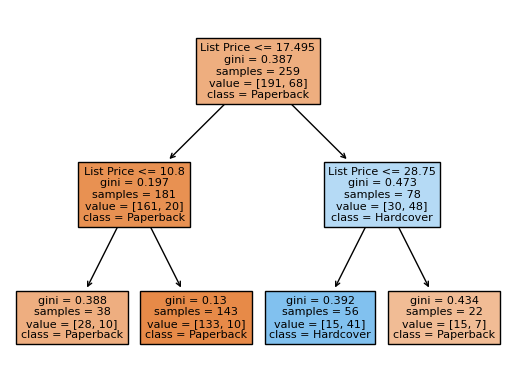

In [24]:
# Prepare X and y
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])["H"]  # 1 for Hardcover, 0 for Paperback
X_train = ab_reduced_noNaN_train[["List Price"]]  # Use List Price as the predictor

# Initialize and train the decision tree
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)


Accuracy: 0.82
Recall: 0.67


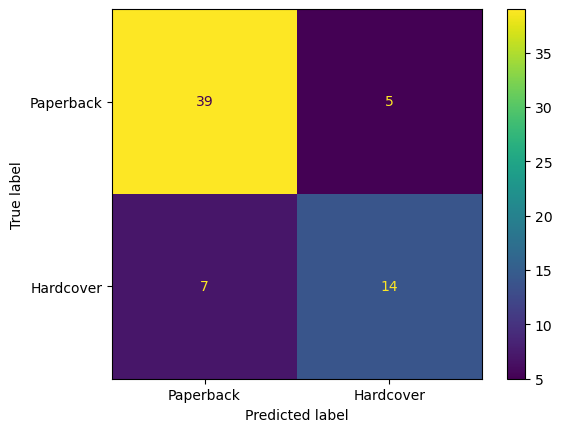

In [25]:
# Prepare X and y for the test set
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])["H"]
X_test = ab_reduced_noNaN_test[["List Price"]]

# Predict on the test set
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Paperback", "Hardcover"]).plot()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")


Question 5

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80/20 split)
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Test set size: {len(ab_reduced_noNaN_test)}")


Training set size: 259
Test set size: 65


In [34]:
from sklearn.tree import DecisionTreeClassifier

# Create the model with max_depth set to 4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier
clf2.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

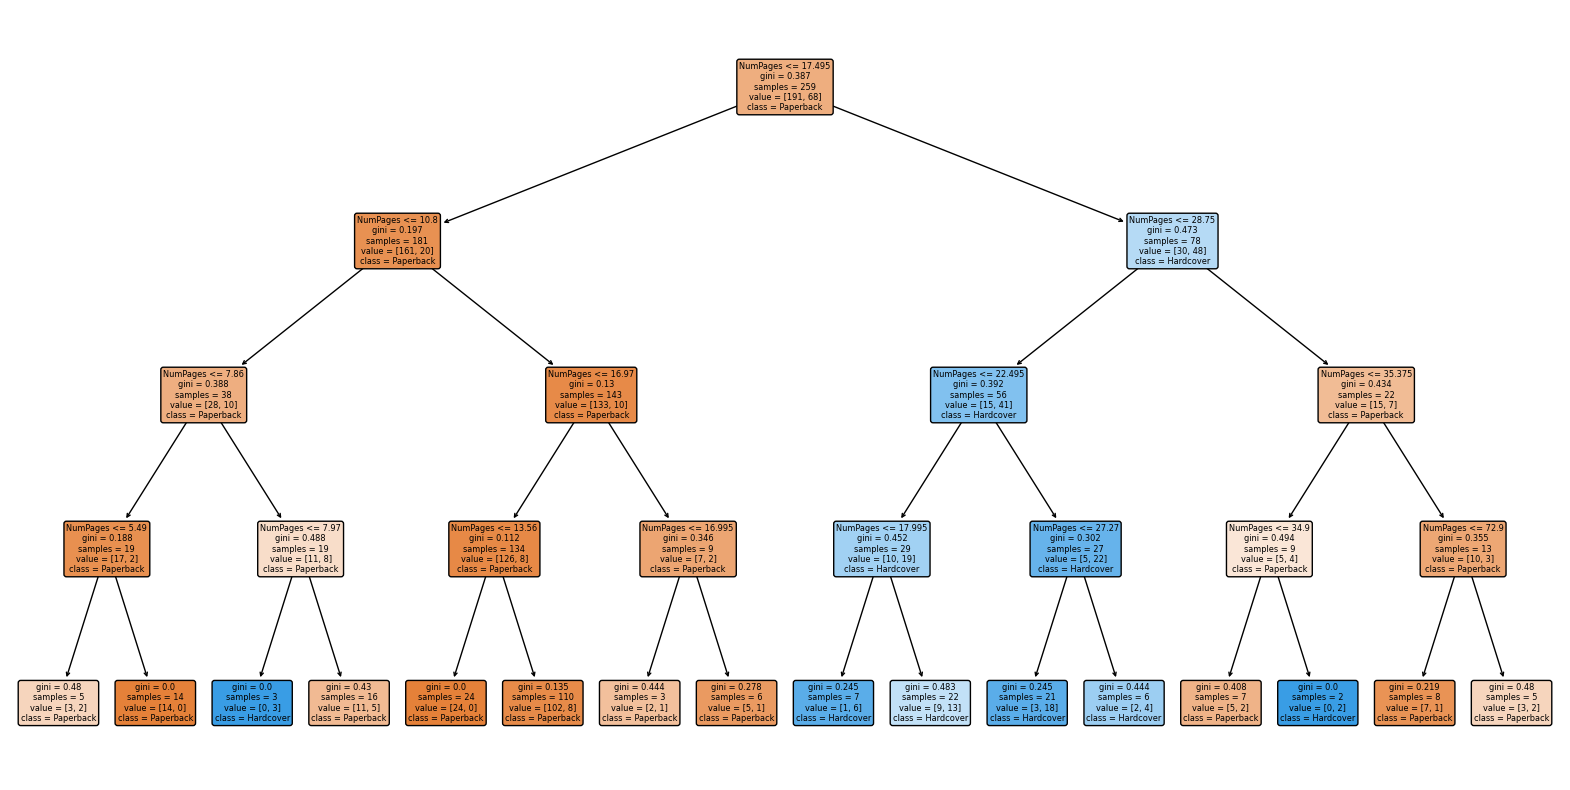

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the trained decision tree
plt.figure(figsize=(20,10))
plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], class_names=['Paperback', 'Hardcover'], rounded=True)
plt.show()


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Predictions for clf2
y_pred_clf2 = clf2.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_clf2)
print("Confusion Matrix:\n", cm)

# Accuracy, Sensitivity, Specificity
accuracy = accuracy_score(y_test, y_pred_clf2)
sensitivity = recall_score(y_test, y_pred_clf2)
specificity = recall_score(y_test, y_pred_clf2, pos_label=0)  # 0 represents the negative class

print(f"Accuracy: {accuracy:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")


Confusion Matrix:
 [[39  5]
 [ 6 15]]
Accuracy: 0.831
Sensitivity: 0.714
Specificity: 0.886


Question 6

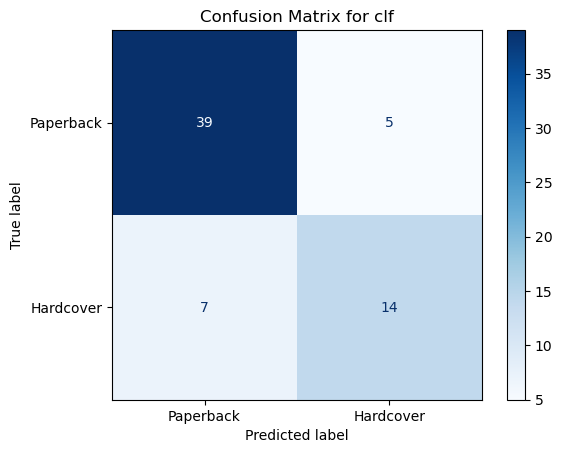

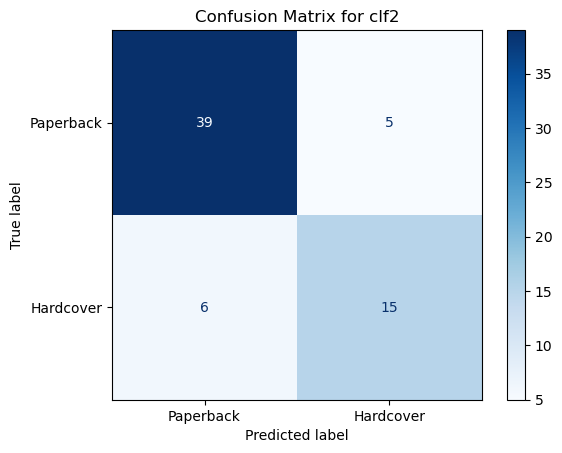

Model 1 (clf) - Sensitivity: 0.667, Specificity: 0.886, Accuracy: 0.815
Model 2 (clf2) - Sensitivity: 0.714, Specificity: 0.886, Accuracy: 0.831


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Predictions for clf and clf2
y_pred_clf = clf.predict(X_test)  # clf predictions
y_pred_clf2 = clf2.predict(X_test)  # clf2 predictions

# Confusion matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot(cmap='Blues')
plt.title("Confusion Matrix for clf")
plt.show()

# Confusion matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot(cmap='Blues')
plt.title("Confusion Matrix for clf2")
plt.show()

# Sensitivity, Specificity, and Accuracy for clf
TP_clf = cm_clf[1, 1]
TN_clf = cm_clf[0, 0]
FP_clf = cm_clf[0, 1]
FN_clf = cm_clf[1, 0]

sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Sensitivity, Specificity, and Accuracy for clf2
TP_clf2 = cm_clf2[1, 1]
TN_clf2 = cm_clf2[0, 0]
FP_clf2 = cm_clf2[0, 1]
FN_clf2 = cm_clf2[1, 0]

sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Print metrics
print(f"Model 1 (clf) - Sensitivity: {sensitivity_clf:.3f}, Specificity: {specificity_clf:.3f}, Accuracy: {accuracy_clf:.3f}")
print(f"Model 2 (clf2) - Sensitivity: {sensitivity_clf2:.3f}, Specificity: {specificity_clf2:.3f}, Accuracy: {accuracy_clf2:.3f}")


Question 7

The differences between the two confusion matrices are due to the features used in the models. The first matrix only uses the List Price, which might not provide enough information to correctly classify books as either paperback or hardcover. The second matrix uses more features (NumPages, Thick, and List Price), giving the model more details to make better predictions.

The confusion matrices for clf and clf2 are better because they use more features, which helps the model make more accurate predictions. With more information, the model can better tell whether a book is paperback or hardcover.